Ordinary Differential Equations
===============================================


### Suggestion

Run the code cell below before the others to make sure that the figures render well.

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4,3)
plt.rcParams['font.size'] = 12

## Exponential Decay
Let us look at a simple example of solving an ordinary differential equation using numerical methods.

Numerically solve and plot a solution $x(t)$ for exponential decay, described by the differential equations

\begin{equation*}
\frac{dy}{dt} = -y.
\end{equation*}

The code cell below has code that uses `solve_ivp` routine in the `scipy.integrate` module to solve the dynamics from $x=1$ at $t=0$. 

In [1]:
import numpy as np

# Import the 'solve_ivp' function from the 'scipy.integrate' module.
from scipy.integrate import solve_ivp

# First, write a function for calculating the RHS of the ODE, which is simply -x
def rhs_function(t, y):
    dydt = -y
    return dydt

# Then, set the initial condition. This MUST be an iterable, even if it is only one number
y_init = [1.0]

# Set an array of t-values where the solution will be evaluated
t_final = 3
times = np.linspace(0.0, t_final, 10)

# Now, call the 'solve_ivp' function with the following arguments in this order:
#  1. Name of the RHS function
#  2. A tuple containing initial and final times
#  3. The initial condition, 
#  4. The array of t-values

soln = solve_ivp(rhs_function, (0, t_final), y_init, t_eval=times)

# Print the result
soln

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.333e-01  6.667e-01  1.000e+00  1.333e+00
             1.667e+00  2.000e+00  2.333e+00  2.667e+00  3.000e+00]
        y: [[ 1.000e+00  7.162e-01  5.131e-01  3.681e-01  2.637e-01
              1.890e-01  1.355e-01  9.704e-02  6.958e-02  4.987e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 32
     njev: 0
      nlu: 0

As you can see, the solution is a python object assigned a variable named 'soln'. This contains solution data, as well as some other numerical information. You can recover the data using object methods. 

In [18]:
#This shows that the numerical method was successful
soln.success

True

The times and y-values obtained numerically can be obtained as follows

In [19]:
soln.t

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

In [20]:
soln.y[0]

array([1.        , 0.71621666, 0.51310341, 0.36814005, 0.26367376,
       0.18898503, 0.13548843, 0.09703629, 0.06958482, 0.04987137])

Now, let us plot the solution data and compare with the analytical solution $y = e^{-t}.$

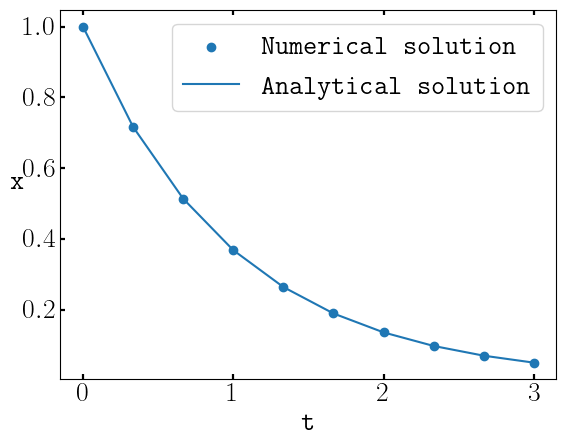

In [21]:
import matplotlib.pyplot as plt

plt.xlabel('t')
plt.ylabel('x', rotation=0)

plt.scatter(times, soln.y[0], label='Numerical solution')
plt.plot(times, np.exp(-times), label='Analytical solution')

plt.legend()

The numerical solution appears to match the analytical solution exactly!!! 

However, there are errors, although they are too small to see here. The solver keeps the local error estimates below a **default tolerance**. 
1. The relative tolerance, given by the internal variable `rtol` is set to $10^{-3}$, and 
2. The absolute tolerance, given by the internal variable `atol`, is set to $10^{-6}$. 
   
The algorithm does extra computations to ensure that the estimated absolute and relative errors are below these tolerances. 

What if we increased them by supplying keyword arguments, thereby reducing the accuracy?

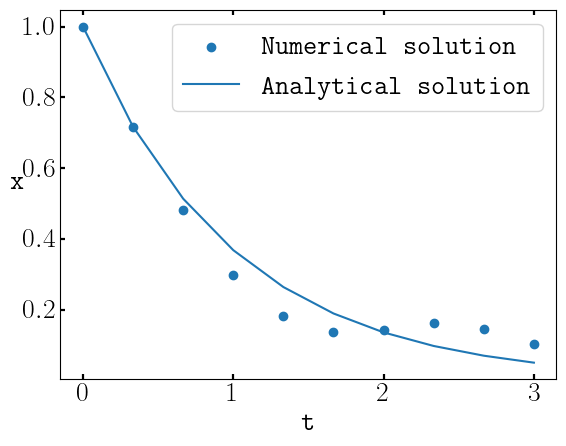

In [23]:
import matplotlib.pyplot as plt

#Note the additional keyword arguments 'rtol' and 'atol' which set the relative and absolute tolerances.
soln = solve_ivp(rhs_function, (0, t_final), y_init, t_eval=times, rtol=0.1, atol=0.1)

plt.xlabel('t')
plt.ylabel('x', rotation=0)
plt.scatter(times, soln.y[0], label='Numerical solution')
plt.plot(times, np.exp(-times), label='Analytical solution')

plt.legend()

By default, the `solve_ivp` routine uses the standard '**Fourth Order Runge-Kutta Method**' to numerically compute solutions to ODEs. The error is estimated by doing each calculation to a higher order ($5^{th}$). Hence, the method can be called by the string `RK45`, although that is usually unnecessary, since that method is the default. 


There are other methods available, such as the well-known and widely-used `LSODA` algorithm devised at the Lawrence Livermore National Laboratory in the USA by Petzold and Hindmarsh. This algorithm is slower, but more stable and can be better suited for some complicated ODE systems.

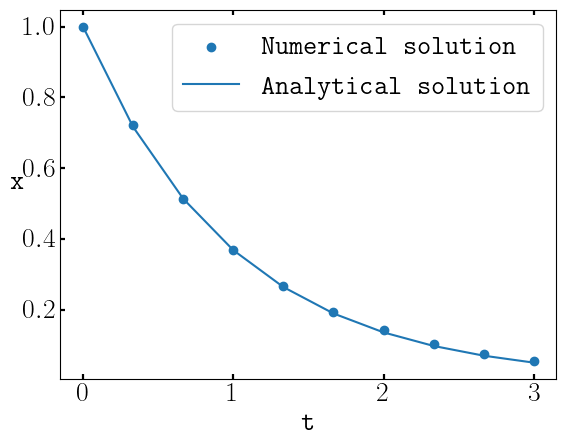

In [25]:
import matplotlib.pyplot as plt

#Note the additional keyword argument 'method' which sets the method to 'LSODA'.
soln = solve_ivp(rhs_function, (0, t_final), y_init, t_eval=times, rtol=0.1, atol=0.1, method='LSODA')

plt.xlabel('t')
plt.ylabel('x', rotation=0)
plt.scatter(times, soln.y[0], label='Numerical solution')
plt.plot(times, np.exp(-times), label='Analytical solution')

plt.legend()

As you can see, the `LSODA` algorithm yields more accurate results with the same error tolerances than the `RK45` method, although `RK45` is the default choice due to its speed. 

In general, the `solve_ivp` routine is called with a minimum of $3$ arguments as follows

```python

from scipy.integrate import solve_ivp

def func_name(t, y, ...):
    ...
    ...
    return dydt

...

result = solve_ivp(func_name, times_tuple, init_cond, t_eval=arr)

...

```

Here, 

1. 'func_name' is the name of a user-generated function that evaluates the RHS terms of the ODE. 
   
2. The RHS function must have the first input argument as the independent variable (time or whatever), the second as the dependent variable (x,y, etc.). Additional arguments are allowed.
   
3. 'times_tuple' refers to a python-tuple that contains two items, namely, the values of the initial and final values of the independent variable (time).
   
4. 'init_cond' refers to the initial value of the dependent variable (x, y etc.)
   
Additionally, it is useful to provide an array of 'times' between the initial and final values as a keyword argument 't_eval'. The solution data is returned by `solve_ivp` as a python object, and the data can be extracted using various object methods.


### Exercise 01:

A spin-$1/2$ particle undergoes quantum precession under a magnetic field in the $x-$ direction. Simulate this using the `solve_ivp` function. The Hamiltonian is given by 
\begin{equation*}
H = -\frac12 \sigma_x.
\end{equation*}
and the system obeys the Schrodinger Equation given by 

\begin{equation*}
H\vert{\psi}\rangle = i  \frac{\partial}{\partial t} \vert{\psi}\rangle,
\end{equation*}

where $\vert{\psi}\rangle$ is a 2-dimensional spinor. Note that, for simplicity, we can set both the magnetic field $B$ and reduced Planck's constant $\hbar$ to unity. Start the state from an eigenstate of $\sigma_z$ like $[1,0]$.

The main difference between this and the previous case is that the differential equation has two dependent variables. It can be written from the Schrodinger equation as follows: If $\vert{\psi}\rangle = \left(y_0, y_1\right)$, then 

\begin{align*}
\frac{\partial}{\partial t} \vert{\psi}\rangle &= -i H\vert{\psi}\rangle \\
\implies  \frac{d}{dt}\begin{pmatrix}
                        y_0\\
                        y_1
                        \end{pmatrix}  &=  \frac{i}{2}\begin{pmatrix}
                                 0 & 1\\
                                 1 & 0 
                                \end{pmatrix}\cdot \begin{pmatrix}
                                                y_0\\
                                                y_1
                                                \end{pmatrix}
\end{align*}

Just like before, this is a first order differential equation, only instead of a single variable `y`, we have an array of two values `[y0, y1]`, and the RHS is a matrix-vector operation. Since we already know how to do this in NumPy, we can easily construct the rhs function for this problem now.

In [26]:
import numpy as np

# Import the 'solve_ivp' function from the 'scipy.integrate' module.
from scipy.integrate import solve_ivp

sx = np.array([[0., 1.],
                [1., 0.]], dtype=np.complex128)

# First, write a function for calculating the RHS of the ODE, which is simply -x
def rhs_spin(t, y):
    dydt = 0.5 * 1j * sx @ y
    return dydt

Now, complete the simulation exercise in the code cell below. Note that the initial condition should also be a NumPy array.

If the solution has evaluated successfully, then plot the expectation value of the $z-$ component of the spin, given by
\begin{equation*}
\left\langle S_x\right\rangle = -\frac12 \left\langle \psi\left\vert \sigma_x\right\vert \psi \right\rangle =  - \frac12  \begin{pmatrix}
                                                y^\ast_0 & y^\ast_1
                                                \end{pmatrix}\cdot \begin{pmatrix}
                                 1 & 0\\
                                 0 & -1 
                                \end{pmatrix}\cdot \begin{pmatrix}
                                                y_0\\
                                                y_1
                                                \end{pmatrix},
\end{equation*}  
as a function of time. Does the plot make sense, given your understanding of basic quantum mechanics?

## The Damped Harmonic Oscillator

We will now use the `solve_ivp` routine and plot solutions $x(t)$ for the damped harmonic oscillator, described by the differential equations

\begin{equation}
\frac{d^2x}{dt^2} + \gamma\frac{dx}{dt} + x = 0.
\end{equation}

We will plot solutions for multiple values of damping rate $\gamma$. Also, we will obtain phase space plots for some of those values of $\gamma$. 

The first thing to notice is that this is a **second order** ODE, different from the previous cases, which were all **first order** ODEs. The `solve_ivp` routine from `scipy` can only solve first order ODEs. However, this is not a problem, as **any** second order ODE can be re-written as two first order ODEs, a type of system that we already solved in exercise 01.

We can recast the equation above in terms of the phase space point $y = \left[y_0, y_1\right] = \left[x, \dot{x}\right]$, yielding two coupled first order ODEs.

\begin{align*}
\dot{y}_0 &= y_1\\
\dot{y}_1 &= -y_0 - \gamma y_1
\end{align*}


The major difference from the previous ODEs is that this one now has a ***parameter*** $\gamma$. Different values of $\gamma$ yield different solutions. Therefore, the RHS function needs to have an extra argument in order to evaluate correctly. 

Also, the `solve_ivp` needs to have a running value of this parameter. This is provided by the keyword argument 'args', so that `solve_ivp` is called as

```python

...

result = solve_ivp(func_name, times_tuple, init_cond, t_eval=arr, args=p_tuple)

...

```

Here, 'p_tuple $=(p_1, p_2, p_3,\dots)$' is a tuple of the values of the running arguments. In this case, since there is only one argument $\gamma$, providing a tuple with one value is required. As an example, if we choose $\gamma=0.3$, then `solve_ivp` can be called as,  

```python

result = solve_ivp(func_name, times_tuple, init_cond, t_eval=arr, args=(0.3, ))

...

```

If we want results for multiple values of a parameter, we can iterate over these values in a loop, and run `solve_ivp` with the appropriate inputs for each iteration. This is shown in the cell below, where we have code that uses `solve_ivp` to solve the dynamics with initial conditions $y_0=1, y_1=0$ at $t=0$.

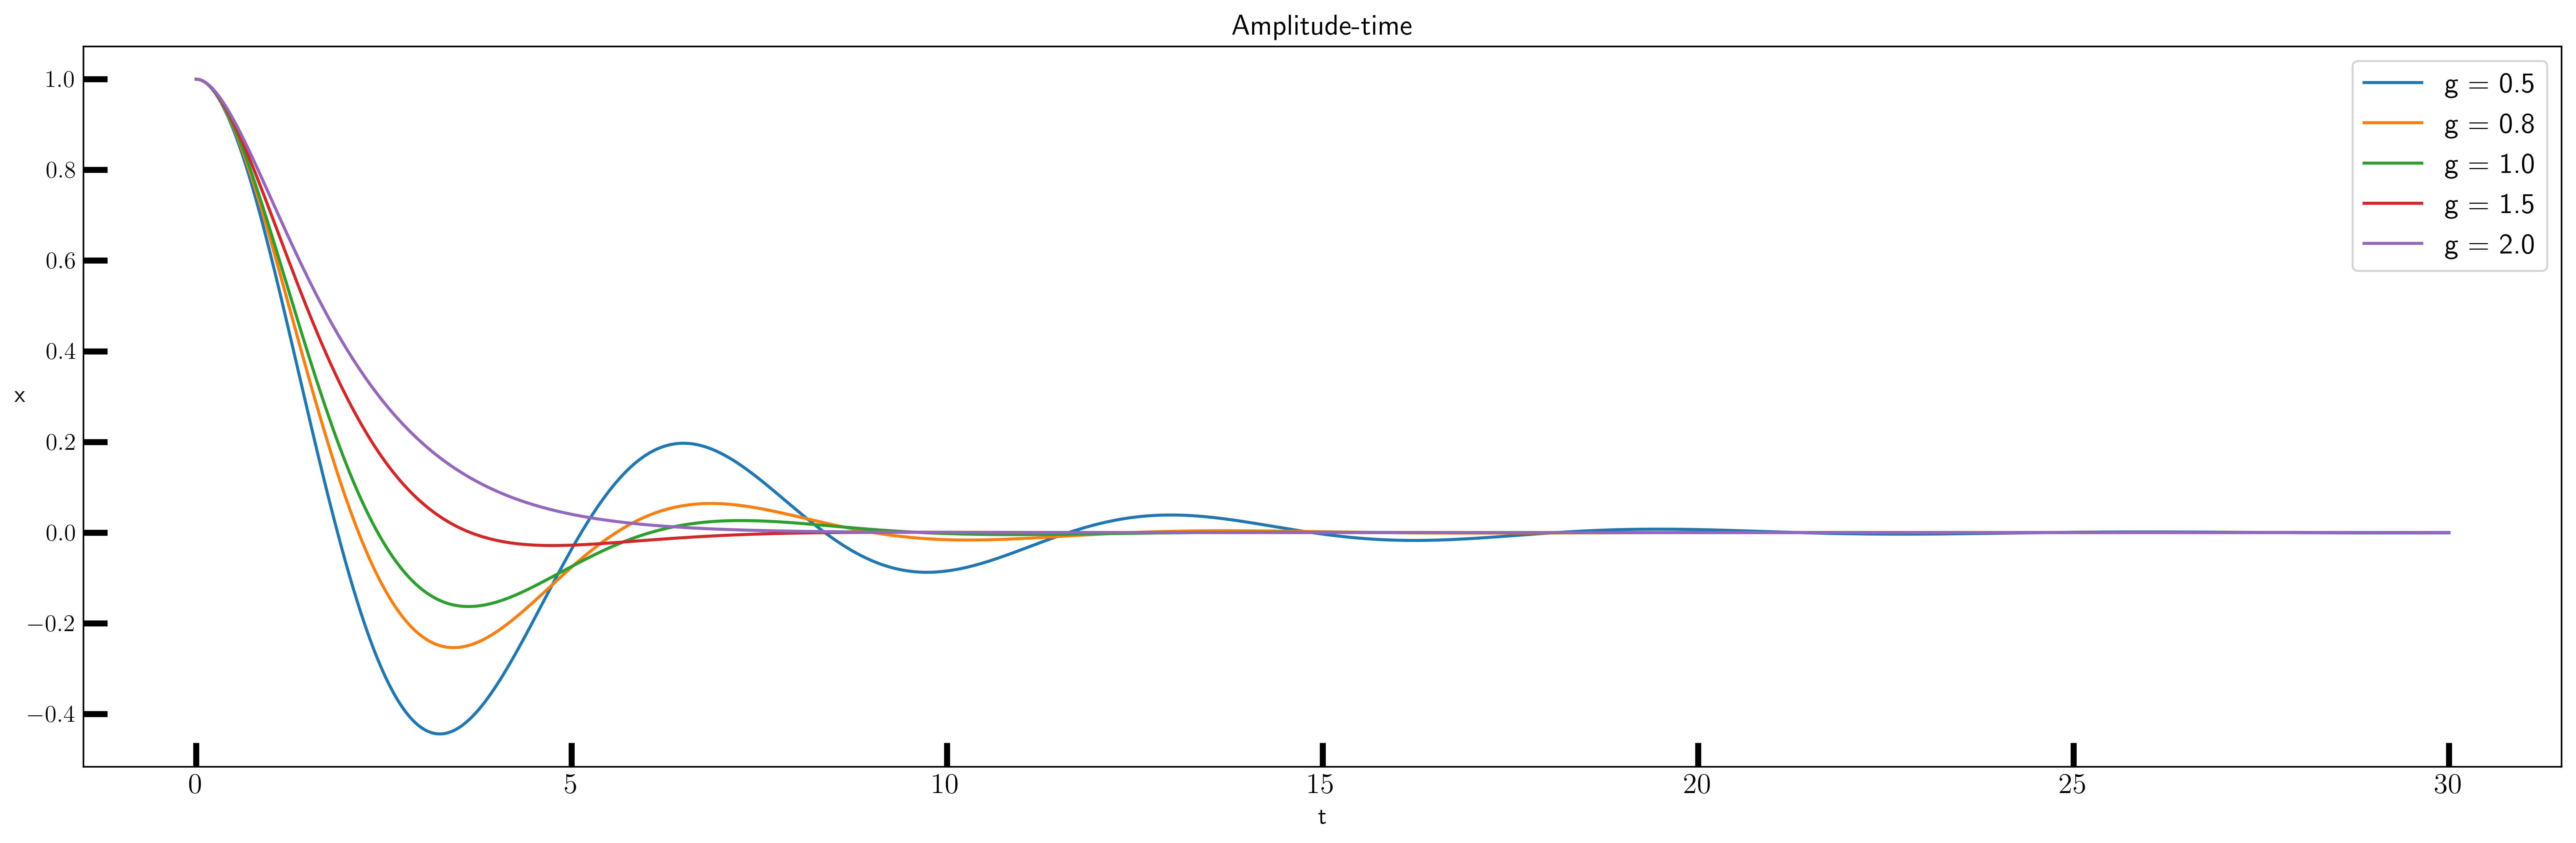

In [41]:
import numpy as np
from scipy.integrate import solve_ivp

# Note that the RHS function 'func' now has an extra argument at the end. This is the parameter 'g' for the damping constant gamma.
def func(t, y, g):
    y0, y1 = y
    dy0dt = y1 
    dy1dt = -y0 - g * y1
    return np.array([dy0dt, dy1dt])


y_init = [1.0, 0.0]
t_final = 30
times = np.linspace(0.0, t_final, 1000)

plt.subplot(1,1,1)
plt.title("Amplitude-time")
plt.xlabel('t')
plt.ylabel('x', rotation=0)
gammas = [0.5, 0.8, 1.0, 1.5, 2.0]
for g in gammas:
    soln = solve_ivp(func, (0, t_final), y_init, t_eval=times, args=(g,))
    plt.plot(times, soln.y[0], label=f'g = {g:1.1f}')
    
plt.legend()   

plt.show()

The next code cells obtain plots for the phase space, $y_1$ vs $y_0$. First, let us create a NumPy grid of multiple $[y_0, y_1]$ initial conditions. To do this quickly, let us use the `np.meshgrid` function from NumPy. This function is used to create a rectangular grid from two given one-dimensional arrays representing Cartesian or matrix indexing. If we create one dimensional line spaces $[x_1, x_2, \dots]$ and $[y_1, y_2, \dots]$, then, `meshgrid` can be used to automatically create a two-dimensional grid from these one-dimensional lines.

In [5]:
y0 = np.linspace(-10, 10, 3)
y1 = np.linspace(-6, 6, 3)

#This creates a grid of 3 X 3 = 9 points from minimum to maximum
Y0, Y1 = np.meshgrid(y0, y1)

print(Y0)
print(Y1)

[[-10.   0.  10.]
 [-10.   0.  10.]
 [-10.   0.  10.]]
[[-6. -6. -6.]
 [ 0.  0.  0.]
 [ 6.  6.  6.]]


Now, the output of `meshgrid` can be vertically stacked to group the $y_0, y_1$ values together. These will be our initial conditions.

In [7]:
#This stacks the points together to an array of [y0,y1] values
ics = np.vstack([Y0.flatten(), Y1.flatten()]).T
ics

array([[-10.,  -6.],
       [  0.,  -6.],
       [ 10.,  -6.],
       [-10.,   0.],
       [  0.,   0.],
       [ 10.,   0.],
       [-10.,   6.],
       [  0.,   6.],
       [ 10.,   6.]])

Now, we prepare the ODE system, as before, and loop through some $\gamma$ values. At each iteration, we nest another loop that iterates through the $9$ initial conditions obtained above and uses `solve_ivp` with each one as the initial condition. At each iteration, the result is plotted using `matplotlib`

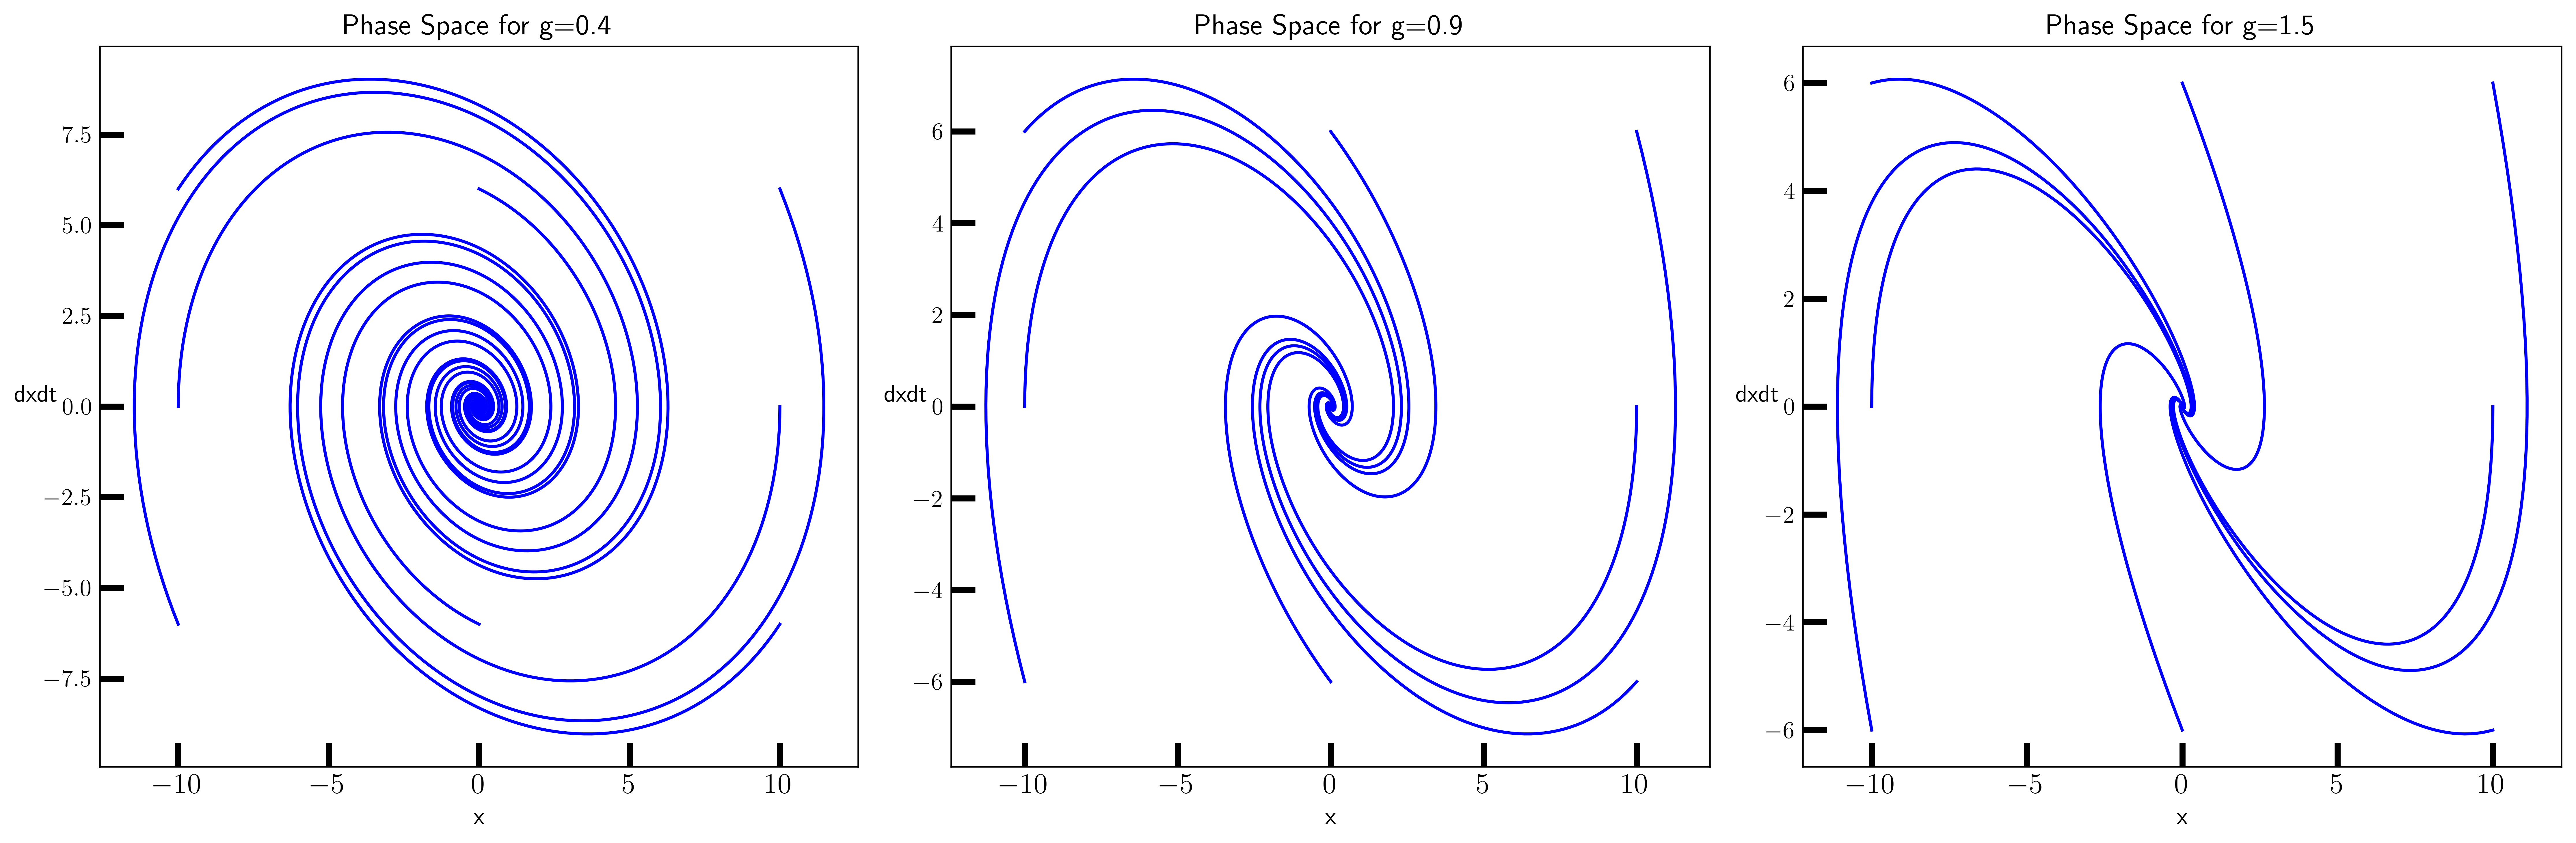

In [46]:
import matplotlib.pyplot as plt
gammas = [0.4, 0.9, 1.5]
t_final = 30
times = np.linspace(0.0, t_final, 1000)

def func(t, y, g):
    y0, y1 = y
    dy0dt = y1 
    dy1dt = -y0 - g * y1
    return np.array([dy0dt, dy1dt])

#Create a figure object that is wide enough to accommodate for each gamma
plt.rcParams['figure.figsize'] = (len(gammas)*6,6)

for i,g in enumerate(gammas):
    #For each gamma, create a subplot with title and axis labels
    plt.subplot(1,len(gammas),i+1)
    plt.title(f"Phase Space for g={g:1.1f}")
    plt.xlabel('x')
    plt.ylabel('dxdt', rotation=0)
    
    #Now, for each initial condition, solve and plot the solution
    for p in ics:
        soln = solve_ivp(func, (0, t_final), p, t_eval=times, args=(g,))
        plt.plot(soln.y[0], soln.y[1], "b-")

plt.show()

### Exercise 02: The Van der Pol Oscillator
Van der Pol’s differential equation is

\begin{equation}
\frac{d^2x}{dt^2} - \mu\left(1-x^2\right)\frac{dx}{dt} + x = 0.
\end{equation}

The equation describes a system with nonlinear damping, the degree of nonlinearity given by $\mu$. If $\mu=0$, the system is linear and undamped, but as $\mu$ increases, so does the strength of the nonlinearity. 

Plot the phase portrait for the solution to Van der Pol’s equation in Python using `solve_ivp`. Remember to recast the equation above as a system of first order ODEs in terms of the phase space point $y = \left[y_0, y_1\right] = \left[x, \dot{x}\right]$:

\begin{align*}
\dot{y}_0 &= y_1\\
\dot{y}_1 &=  \mu\left(1-y^2_0\right) y_1 - y_0
\end{align*}

If $\mu=0$, we have a simple harmonic oscillator and the phase portrait is simply a circle. For larger values of $\mu$, the solutions enter limit cycles, but the cycles are more complicated than just circles. These cycles are periodic attractors: every non-trivial solution converges to the limit cycle. Show the phase plot for $\mu=0$ and at least $2$ small non-zero values of $\mu$. You may choose just one trajectory for each value of $\mu$ and plot them together in the same graph.